<a href="https://colab.research.google.com/github/lab30041954/ML_IESE_Course/blob/main/%5BML-01%5D%20Logistic%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [ML-01] Logistic regression

## What is machine learning?

The objective of **artificial intelligence** (AI) is create agents that perform certain tasks in an "intelligent" way. An **AI agent** can be something physical, like a robot that sweeps the floor, or a software app, like a model that classifies the potential customers of a lending institution as good or bad creditors.

**Machine learning** (ML) takes place when the AI agent learns from data how to perform its task. We operationalize the learning process as follows. We design a **model**, which can be as simple as a single equation, or as complex as **Gemini 3.0**. The model has a set of **parameters**. The number of parameters can be high (more than one trillion in some large language models), so it is often unclear what their specific role is. Then the learning process consists in using the data to find the **optimal values** for the parameters. 

Instead of talking about "learning", a statistician would say that he is **fitting** the model to the data, or **estimating** the parameters of the model. This terminology is used in one of the **Python** libraries used in this course, **scikit-learn**. 

Finding the optimal parameter values is also called **training**. The data used for training the model are then the **training data**. A major issue with training a model is that the parameter values that are optimal on the training data may be suboptimal on data that have not been involved in the training, so that the model underperforms in real applications. This is the **overfitting** problem.

To assess the potential overfitting, the model is tested on different data, which are then called **test data**. This is **model validation**. Validation is needed for models whose complexity allows them to overfit the data. Overfitting is a fact of life for many ML algorithms, *e.g*. for those used to develop **neural network models**. So, validation is integrated in the learning process for these models.

This course is restricted to **supervised learning**. Roughly speaking, this is what the statisticians call **prediction**, that is, the description of one variable ($Y$) in terms of other variables (the $X$'s). In the ML context, $Y$ is called the **target**, and the $X$'s are called the **features**. The units (they can be customers, products, etc) on which the features and the target are observed are called **samples** (this term has a different meaning in statistics).

The term **regression** applies to the prediction of a (more or less continuous) numeric target, and the term **classification** to the prediction of a categorical target. In **binary classification**, there are only two target values or **classes**, while, in **multi-class classification**, there can be three or more. A **classifier**, or classification model, predicts a probability for every class.

In an example of regression, we may try to predict the price of a house from a set of attributes of that house. In one of classification, whether a customer is going to quit our company, from his/her demographics plus some measures of customer activity.


## What is scikit-learn?

The Python library scikit-learn (`sklearn` in the code) is a machine learning toolkit, built on top of thed libraries NumPy, SciPy and Matplotlib, which comes as a package with many subpackages. To get an idea of the hierarchy and these subpackages, the best source is the **scikit-learn API Reference** (`scikit-learn.org/stable/modules/classes.html`). Some of them are used in this course: `linear_model`, `tree`, `metrics`, `ensemble`, etc.

The subpackages that we use for supervised learning contain a collection of **estimator classes**, which allow us to create and apply predictive models. In this course, we use a number of these classes: `LinearRegression()`, `LogisticRegression()`, `DecisionTreeClassifier()`, etc. In Python, a **class** is like an object constructor, or a "blueprint" for creating objects. Even if they may look intimidating at first sight, it is very easy, in practice, to pick a class from a Python package and create an object of that class, as you will see in the examples of this course.

Working with scikit-learn, you may get a **warning** from time to time. Note that a warning is not the same as an **error message**. An error message stops the execution of your command, while a warning does not. Most of the warnings will tell you nothing of interest, but a few ones contain relevant information, so it is recommended to take a look at them with the corner of your eye.

To train a supervised learning method in scikit-learn, you have to specify a (1D) **target vector** `y` and a (2D) **feature matrix** `X`. In regression, both `X` and `y` have to be of numeric or Boolean type, but, in classification, `y` can be a string vector. Both NumPy arrays and Pandas data containers are accepted, but the scikit-learn methods always return NumPy arrays.

## Classification basics

**Classification** is the prediction of a **categorical target**. The target values are called **classes**, and they are indicated in the training data by **class labels**. In a classification model, the **predicted class** is obtained in two steps:

* For every sample, the model calculates a set of **predicted class probabilities**, one for each class. The different types of models differ in the way in which they calculate these probabilities.

* The **predicted class** is the one with higher probability.

This is the **default prediction** method. When this approach is used, the class probabilities may be hidden, so the model is presented as if it were making the predictions directly. But departure from the default is not rare in many real-world applications.

An important case is **class imbalance**. This occurs when the proportion of training units in one class is significantly different from the proportion of training units in the other classes. Class imbalance appears in the example of this lecture in a casual way, and will be discussed more specifically in the next lecture.

In **binary classification**, there are two classes, typically called **positive** and **negative**. Use the names positive/negative so that they favor your intuition. Mind that, if you leave this to the computer, it may call positive what you regard as negative.

In a binary setting, managing two complementary probabilities is redundant, so we can focus on the positive class probability. This probability, called the **predictive score**, is used for management purposes in many business applications (*e.g*. in credit scoring).

In the default binary prediction, a sample would be classified as positive when its score exceeds 0.5. But you may wish to replace 0.5 by a different **threshold** value. In a business application, the choice of the threshold is based on a more or less rigorous **cost/benefit analysis**. For instance, given a **cost matrix**, a user can run a linear search for an **optimal threshold**.

## The confusion matrix

The evaluation of a classifier is, explicitly or implicitly, based on a **confusion matrix**, obtained by cross tabulation of the actual classes and the predicted classes. There is not a universal consensus on what to place in the rows and what in the columns. We use here the same convention as the scikit-learn manual, with the actual class in the rows and the predicted class in the columns.

In a binary setting, a visual inspection of the confusion matrix is recommended. The four cells of the confusion matrix are referred to as **true positive** (actual positives predicted as positives), **false positive** (actual negatives predicted as positives), **true negative** (actual negatives predicted as negatives) and **false negative** (actual positives predicted as negatives).

<br/>

| | Predicted negative | Predicted positive |
| --- | :---: | :---: |
| **Actual negative** | TN | FP |
| **Actual positive** | FN | TP |

<br/>

The proportion of samples classified in the right way, that is, those for which the actual and the predicted values coincide, is called the **accuracy**,

$$\textrm{Accuracy} = \frac{\textrm{TN}+\textrm{TP}} {\textrm{TN}+\textrm{FP}+\textrm{FN}+\textrm{TP}}\thinspace.$$

The accuracy can be calculated directly, or extracted from the confusion matrix, as the sum of the diagonal terms divided by the sum of all terms. Although it looks as the obvious metric for the evaluation of a classifier, the accuracy is not always adequate, specially when the training data present class imbalance. For instance, if you have a 90% of negative training units, classifying all the training units as negative gives you 90% accuracy (you don't need machine learning for that!).

In many cases, it is useful to examine the performance of the classifier separately on the actual positives and the actual negatives. Various metrics can be extracted from the confusion matrix, but this course only uses two:

* The **true positive rate** is the proportion of right classification among the actual positives,

$$\textrm{TP\ rate} = \frac{\textrm{TP}} {\textrm{TP}+\textrm{FN}}\thinspace.$$

* The **false positive rate** is the proportion of wrong classification among the actual negatives,

$$\textrm{FP\ rate} = \frac{\textrm{FP}} {\textrm{FP}+\textrm{TN}}\thinspace.$$

A good model should have both a high true positive rate and a low false positive rate low. The relative importance given to these statistics depends on the actual application. Their advantage is that they are still valid when the proportion of positives in the training data has been artificially inflated, because they are calculated separately on the actual positives and the actual negatives. This may look strange, but it is common practice under class imbalance. When the proportion of positives is inflated, the training data cannot be taken as representative of any population, and the accuracy derived from the confusion matrix cannot be extrapolated to the real world.


## The maths of machine learning

In machine learning, the parameter values learned are optimal, meaning that a certain **loss function** attains its minimum value. Typically, the loss function in a classification model is the **average cross-entropy**, a formula extracted from information theory. For every data unit, the cross-entropy is the negative logarithm of the predicted class probability of the actual class of that unit. scikit-learn uses binary logs, as in information theory, but other libraries, like **Keras**, use natural logs. You should not be concerned by this, because you don't really use these cross-entropy values, they are just part of mathematical apparatus.

Let us show, explicitly, how the cross-entropy is calculated in a binary setting, using natural logs:

* Take a positive sample whose predicted class probabilities are $0.2$ (for the negative class) and $0.8$ (for the positive class). Then, the cross-entropy for this sample is $-\log\thinspace 0.8 = 0.2231$. 

* Take a negative sample whose class probabilities are $0.7$ and $0.3$, respectively. Then, the cross-entropy for this sample is $-\log\thinspace 0.7 = 0.3567$. 

The average of these values for the all the training units is the loss. What is the logic of using this loss function? As shown in Figure 1, the negative log function is decreasing , with the minimum value $-\log\thinspace 1 = 0$, so that by minimizing the cross-entropy, we are pushing the class probabilities of the negative units towards the pair $(1, 0)$ and those of the positive units towards the pair $(0, 1)$, that would be the perfect predictions.

![](https://raw.githubusercontent.com/lab30041954/Figures/main/neglog.png)

We don't have a closed formula to calculate the optimal parameter values. The optimal parameter values are obtained by means of an **optimization algorithm**, called the **solver**, which starts with a set of random parameter values and changes these values in a sequence of steps or **iterations**, decreasing the loss at every step. The iterative process goes on until the loss falls below a certain **tolerance** or until a **maximum number of iterations** has been attained. Then we say that the process has achieved **convergence**. When the feature scales are diverse, this process is slower, and the number of iterations needed to converge is higher. We will see this in the examples.


## Logistic regression

**Logistic regression** is one of the simplest classification methods. In spite of its name, it is a classification method, not a regression method. The explanation is that logistic regression was created by statisticians, and regression does not mean the same in statistics as in machine learning.

The class probabilities are calculated as follows. Suppose that $k$ numeric features $X_1, \dots, X_k$ are used to predict a target with $m$ classes. The logistic regression model is based on a set of linear equations, 

$$z = b_0 + b_1X_1 + b_2X_2 + \cdots + b_kX_k,$$

one for each class. The coefficients in the equations, $b_0$, $b_1$, $\dots$, $b_k$, are the parmaters of the model. The values $z_1, \dots, z_m$, called the **logits**, are transformed in class probabilities $p_1, \dots, p_m$ by means of the **softmap function**

$$p_i = \frac{\exp(z_i)}{\exp(z_1) + \cdots + \exp(z_m)}.$$

Note that, since $p_1 + \cdots + p_m = 1$, one of the equations can be obtained from the rest, so the parameter values and, consequently, the logits are not uniquely determined. Don't worry about this, Python will take care and, in practice, the logits are never extracted explicitly.

## Example - The churn model

### Introduction

The term **churn** is used in marketing to refer to a customer leaving the company in favor of a competitor. Churning is a common concern of **Customer Relationship Management** (CRM). A key step in proactive churn management is to predict whether a customer is likely to churn, since an early detection of the potential churners helps to plan the retention campaigns.

This example presents a churn model based on a **logistic regression model**, for a company called *Omicron Mobile*, which provides mobile phone services. The data set is based on a random sample of 5,000 customers whose accounts were still alive by September 30, and have been monitored during the fourth quarter. 968 of those customers churned during the fourth quarter, a **churning rate** of 19.4%.

### The data set

The variables included in the data set (file `churn.csv`) are:

* `id`, a customer ID (the phone number).

* `aclentgh`, the number of days the account has been active at the beginning of the period monitored.

* `intplan`, a dummy for having an international plan.

* `dataplan`, a dummy for having a data plan.

* `ommin`, the total minutes call to any Omicron mobile phone number, voicemail or national landline.

* `omcall`, the total number of calls to any Omicron mobile phone number, voicemail or national landline.

* `otmin`, the total minutes call to other mobile networks.

* `otcall`, the total number of calls to other networks.

* `ngmin`, the total minutes call to nongeographic numbers. Nongeographic numbers, such as UK numbers 0844 or 0871, are often helplines for organizations like banks, insurance companies, utilities and charities.

* `ngcall`, the total number of calls to nongeographic numbers.

* `imin`, the total minutes in international calls.

* `icall`, the total international calls.

* `cuscall`, the number of calls to customer service.

* `churn`, a dummy for churning.

All the data are from the third quarter except the last variable.

Source: MA Canela, I Alegre & A Ibarra (2019), *Quantitative Methods for Management*, Springer.

### Questions

Q1. Develop a logistic regression model to calculate a **churn score**, that is, an estimate of the probability of churning, for each customer.

Q2. How is the distribution of churn scores? Is it different for the churners and the non-churners?

Q3. Set an adequate **threshold** for the churn score and apply it to decide which customers are potential churners. What is the **true positive rate**? And the **false positive rate**?

### Importing the data

In the examples of this course, we manage the data sets as **Pandas data frames**. First, we import Pandas in the usual way:

In [1]:
import pandas as pd

The data sources will be remote. More specifically, the source files are stored in a **GitHub repository**. This is practical, since, in Pandas, remote source files work the same as local files, the only difference being in the path. For our source files, the path will always be:

In [2]:
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'

This path can be joined to the file name, as path + filename (in Python, the plus sign + can be used to concatenate strings). Don't forget that the path must match the current location of the data source file, either local or remote.

Now, we import the data, as a Pandas data frame, with the Pandas function `read_csv()`. We take the first column in the source file (`id`) as the index (with the argument `index_col=0`), so it will not be included in the analysis. You can otherwise, but be careful to leave this column aside.

In [3]:
df = pd.read_csv(path + 'churn.csv', index_col=0)

### Exploring the data

`df` is a Pandas data frame. In the report printed by the method `.info()`, we don't find anything unexpected. There are no missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 409-8978 to 444-8504
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   aclength  5000 non-null   int64  
 1   intplan   5000 non-null   int64  
 2   dataplan  5000 non-null   int64  
 3   ommin     5000 non-null   float64
 4   omcall    5000 non-null   int64  
 5   otmin     5000 non-null   float64
 6   otcall    5000 non-null   int64  
 7   ngmin     5000 non-null   float64
 8   ngcall    5000 non-null   int64  
 9   imin      5000 non-null   float64
 10  icall     5000 non-null   int64  
 11  cuscall   5000 non-null   int64  
 12  churn     5000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 546.9+ KB


### Q1. Logistic regression model

We use scikit-learn to obtain our logistic regression model. We start by creating a **target vector** `y` and a **features matrix** `X`. In this example, the target vector is the last column (`churn`), and the features matrix is made of the other columns.

In [5]:
y = df['churn']
X = df.drop(columns='churn')

In this example, we use the class `LogisticRegression()`, from the scikit-learn subpackage `linear_model`. 

In [6]:
from sklearn.linear_model import LogisticRegression

Our estimator will be an **instance** of this class, that is, an object which applies the logistic regression technique. We call this estimator `clf` (to remind us that it is a classifier). Instead of accepting the default parameter values, we increase the **maximum number of iterations**. Using the default `max_iter=100` would have raised a warning indicating that the optimization process had not yet converged.

In [7]:
clf = LogisticRegression(max_iter=2000)

In scikit-learn, irrespective of the type of estimator, three basic methods, namely `.fit()`, `.predict()` and `.score()`, are available. The method `.fit()` performs the training, that is, it searches for the parameter values that work best for the data. In practice, this means those values for which the loss (the average cross-entropy) is minimum.

In [8]:
clf.fit(X, y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


The method `.score()` performs an overall evaluation of the model. For a classification model, this is the accuracy. We round it to three digits.

In [9]:
round(clf.score(X, y), 3)

0.842

At first sight, 84.2% of right prediction may look like a feat, but not so if we take into account, the degree of class imbalance in these data. With only 19.4% positive cases, 80.6% accuracy can be obtained in a trivial way. So let us take a closer look at the performance of this model.

As given by the method `.predict()`, the predicted class is obtained as discussed in our general introduction to classification models. In this example, this means that two complementary class probabilities are calculated for every customer, one for churning (`y == 1`) and one for not churning (`y == 0`). These probabilities can be extracted with the method `.predict_proba()`:

In [10]:
clf.predict_proba(X)

array([[0.9527001 , 0.0472999 ],
       [0.96875544, 0.03124456],
       [0.72551191, 0.27448809],
       ...,
       [0.871238  , 0.128762  ],
       [0.40603354, 0.59396646],
       [0.17404007, 0.82595993]], shape=(5000, 2))

Mind that Python sorts the classes alphabetically. In the binary case, this means that the negative class comes first. The probability of the positive class is taken as a predictive score. These scores are extracted as:

In [11]:
df['score'] = clf.predict_proba(X)[:, 1]

Note that we have added the scores as a column to our data set, which is just an option, since we can also manage it as a separate vector. The actual class and the predictive score are now the last two columns in `df`.

In [12]:
df[['churn', 'score']]

,churn,score
id,,
409-8978,0,0.047300
444-7077,0,0.031245
401-9132,0,0.274488
409-2971,0,0.131657
431-5175,0,0.069270
...,...,...
390-2408,0,0.572826
407-6398,0,0.267134
444-7620,1,0.128762


### Q2. Distribution of the churn scores

We can visualize the distribution of the predictive scores through a histogram. In this case, we plot separately the scores for the churners (968) and the non-churners (4,032). To do this, we use the module `pyplot` of the library **Matplotlib**. We import it as:

In [13]:
from matplotlib import pyplot as plt

You can see below a code chunk for plotting the two histograms side-by-side. The `plt.figure()` line specifies the total size of the figure. Then, `plt.subplot(1, 2, 1)` and `plt.subplot(1, 2, 2)` start the two parts of this code chunk, one for each subplot. These parts are easy to read after our previous experience with the histogram in example ML-04. The argument `range=(0,1)` is used to get intervals of length 0.1 (the default of `.hist()` splits the range of the data in 10 intervals), which are easier to read. The argument `edgecolor=white` improves the picture. 

Note that `plt.subplot(1, 2, i)` refers to the $i$-th subplot in a grid of one row and two columns. The subplots are ordered by row, from left to righ and from top to bottom.

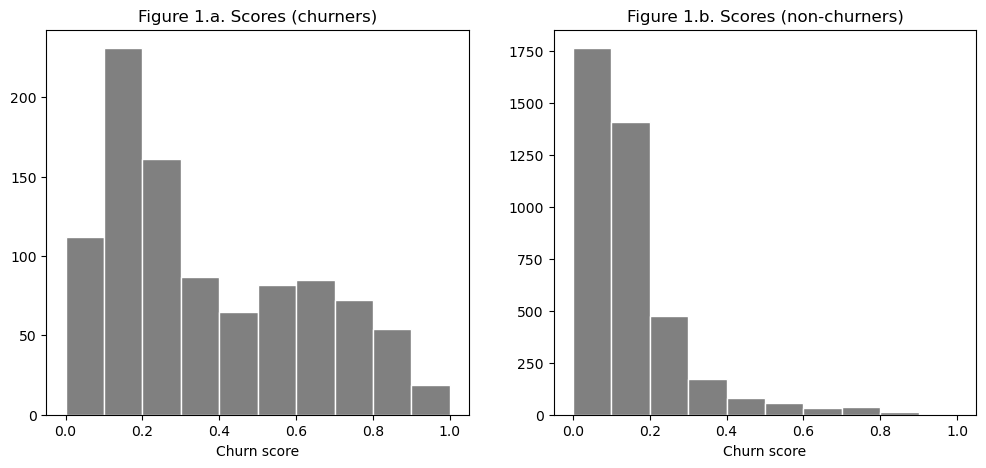

In [14]:
# Set the size of the figure
plt.figure(figsize=(12,5))
# First subplot
plt.subplot(1, 2, 1)
plt.hist(df['score'][y == 1], range=(0,1), color='gray', edgecolor='white')
plt.title('Figure 1.a. Scores (churners)')
plt.xlabel('Churn score')
# Second subplot
plt.subplot(1, 2, 2)
plt.hist(df['score'][y == 0], range=(0,1), color='gray', edgecolor='white')
plt.title('Figure 1.b. Scores (non-churners)')
plt.xlabel('Churn score');

You can now imagine the threshold as a vertical line, and move it, right or left from the default threshold value 0.5. The customers falling on the right of that vertical line would be classified as positive, and those falling on the left as negative.

### Q3. Set a threshold for the churn scores

The method `.predict()` uses the default threshold 0.5. It is plainly seen in Figure 1.a, that, in this way, we are missing more than one half of the churners. So, in spite of its accuracy, our model would not be adequate for the actual business application.

In [15]:
y_pred = clf.predict(X)

The **confusion matrix**, resulting from the cross tabulation of the actual and the predicted target values, confirms this visual intuition. Confusion matrices can be obtained in many ways. For instance, with the function `confusion_matrix()` of the scikit-learn subpackage `metrics`:

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[3896,  136],
       [ 656,  312]])

The accuracy returned by the method `.score()` is the sum of the diagonal terms of this matrix divided by the sum of all terms of the matrix.

As we guessed from the histogram, our churn model is not capturing enough churners (304/968) for a business application. To predict more positives, we have to lower the threshold. Figure 1.a suggests that we have to go down to about 0.2 to make a real difference, while Figure 1.b warns us against lowering it further. So, let us try 0.2. The new vector of predicted clases can then be obtained as:

In [17]:
y_pred = (df['score'] > 0.2).astype(int)

The new confusion matrix is:

In [18]:
confusion_matrix(y, y_pred)

array([[3167,  865],
       [ 343,  625]])

Indeed, we are capturing now about 2/3 of the churners. This comes at the price of raising the false positives to 866, which affects the accuracy (now, it is 0.758).

A clear way to summarize the evaluation of the model comes through the true positive and false positive rates. They can be extracted from the confusion matrix or calculated directly. The true positive rate is the proportion of predicted positives among the actual positives (0.646). The false positive rate is the proportion of predicted positives among the actual negatives (0.215).

### Homework

1. In this data set, there is a mix of scales, which can be visualized with the method `.describe()`. This mix slowns down the convergence in the  method `.fit()`, so we had to increase the parameter `max_iter`. This is not a relevant issue in a model as simple as the one used in this example, but it will be in the complex models that will appear later in this course, such as the **neural network models**. Try different values for `max_iter` in the specification of the `LogisticRegression()` and examine how the maximum number of iterations affects the model accuracy in this case.

2. Rescale all the features which are not dummies and train the logistic regression classifier with the default number of iterations. Do you get a warning about non-convergence now?

3. Assume that the Omicron management plans to offer a **20% discount** to the customers that the model classifies as potential churners, and that this offer is going to have a 100% success, so the company will retain all the churners detected. Evaluate the benefit produced by this **retention policy** with the two models presented in this example.

4. Write a Python function which gives the benefit in terms of the threshold and find an **optimal threshold** for this retention policy.